In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

PATH_DATA_CASES = './data/computed/cases.csv'

## Read data for number of cases and possible features + remove datasets with missing values

In [2]:
df = pd.read_csv(PATH_DATA_CASES)
df.dropna(inplace=True)

In [3]:
print(df.shape)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

(163, 9)


,total_cases,total_cases_per_million,gdp_per_capita,health_expenditure_5y_avg,Population density (people per sq. km of land area),lockdown_type,"International tourism, expenditures (% of total imports)"
total_cases,1,0.25,0.17,0.31,-0.021,0.085,0.03
total_cases_per_million,0.25,1,0.62,0.066,0.19,0.14,0.28
gdp_per_capita,0.17,0.62,1,0.2,0.28,0.3,0.2
health_expenditure_5y_avg,0.31,0.066,0.2,1,-0.059,0.17,0.046
Population density (people per sq. km of land area),-0.021,0.19,0.28,-0.059,1,0.029,0.033
lockdown_type,0.085,0.14,0.3,0.17,0.029,1,0.044
"International tourism, expenditures (% of total imports)",0.03,0.28,0.2,0.046,0.033,0.044,1


In [4]:
df_with_countries = df.copy()
df.drop(["iso_code", "location", "total_cases"], axis=1, inplace=True)

In [5]:
X = df.drop("total_cases_per_million", axis=1)
y = df["total_cases_per_million"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## Linear Regression

In [6]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1526.4537396400342
Mean Squared Error: 4080924.1155516584
Root Mean Squared Error: 2020.1297274065491


In [7]:
df.describe()

,total_cases_per_million,gdp_per_capita,health_expenditure_5y_avg,Population density (people per sq. km of land area),lockdown_type,"International tourism, expenditures (% of total imports)"
count,163.000000,163.000000,163.000000,163.000000,163.000000,163.000000
mean,1721.695454,19154.336908,6.458670,215.133291,0.684049,6.191332
std,3272.239036,19904.861742,2.522083,667.971201,0.437293,4.531365
min,1.867000,661.240000,2.224253,2.040609,0.000000,0.028524
25%,120.187000,4711.600500,4.539472,37.416563,0.000000,2.963447
50%,457.004000,12294.876000,6.289129,84.605985,1.000000,5.436048
75%,2026.134000,27467.146000,8.156820,207.885273,1.000000,8.817263
max,30684.193000,116935.600000,16.795518,7952.998418,1.000000,21.933781


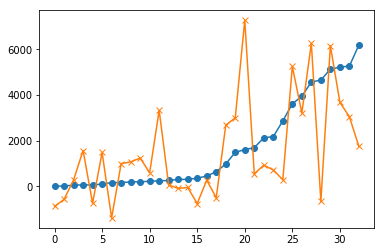

In [26]:
temp = []
for i in range(len(y_pred)):
    temp.append({ "actual": y_test[y_test.index[i]], "predicted": y_pred[i]})
def get_actual(obj):
    return obj["actual"]
temp = sorted(temp, key=get_actual)
plt.plot([x for x in range(len(temp))], [t["actual"] for t in temp], '-o')
plt.plot([x for x in range(len(temp))], [t["predicted"] for t in temp], '-x')
plt.show()

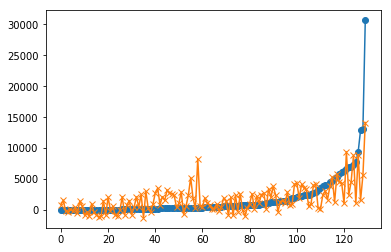

In [32]:
y_train_pred = regressor.predict(X_train)
temp2 = []
for i in range(len(y_train_pred)):
    temp2.append({ "actual": y_train[y_train.index[i]], "predicted": y_train_pred[i]})
def get_actual(obj):
    return obj["actual"]
temp2 = sorted(temp2, key=get_actual)
plt.plot([x for x in range(len(temp2))], [t["actual"] for t in temp2], '-o')
plt.plot([x for x in range(len(temp2))], [t["predicted"] for t in temp2], '-x')
plt.show()